In [1]:
import xml.etree.ElementTree as ET
import os
import re

In [2]:
PATTERN1 = re.compile(r"(?<=[a-zA-Z])\n")
PATTERN2 = re.compile(r"\s+")

def clean_text(text):
    out = PATTERN1.sub(". ", text)
    return PATTERN2.sub(" ", out)

In [3]:
def load_data(path):
    data = []
    for file in os.listdir(path):
        with open(f"{path}/{file}", "r") as f:
            raw = f.read()
        root = ET.fromstring(raw)
        doc = clean_text(root.find("body").text)
        for summary in root.find("summaries").findall("summary"):
            if summary.attrib["ratio"] == "10":
                kind = summary.attrib["type"]
                text = clean_text(summary.find("body").text)
                data.append((doc, text, kind))
    return data

In [4]:
data = load_data("PSC_1.0/data")

# TextRank

In [5]:
import numpy as np
import pandas as pd

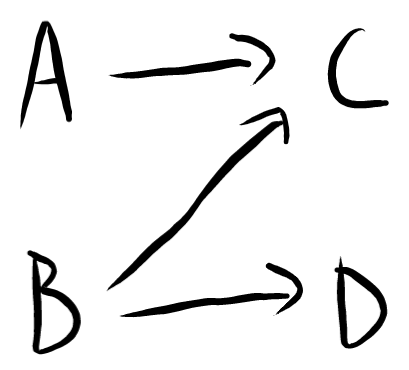

In [6]:
mx = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [1, 0.5, 0, 0], [0, 0.5, 0, 0]])
pd.DataFrame(mx, columns=["A", "B", "C", "D"], index=["A", "B", "C", "D"])

,A,B,C,D
A,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0
C,1.0,0.5,0.0,0.0
D,0.0,0.5,0.0,0.0


In [7]:
page_rank = np.array([1, 1, 1, 1])
d = 0.85

In [8]:
for i in range(5):
    page_rank = (1 - d) + d * np.dot(mx, page_rank)
    print(f"iteracja: {i} - page rank: {page_rank}")

iteracja: 0 - page rank: [0.15  0.15  1.425 0.575]
iteracja: 1 - page rank: [0.15    0.15    0.34125 0.21375]
iteracja: 2 - page rank: [0.15    0.15    0.34125 0.21375]
iteracja: 3 - page rank: [0.15    0.15    0.34125 0.21375]
iteracja: 4 - page rank: [0.15    0.15    0.34125 0.21375]


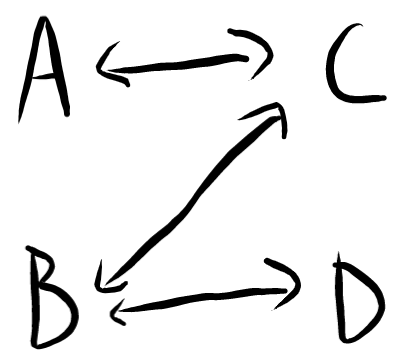

In [9]:
mx = np.array([[0, 0, 0.5, 0], [0, 0, 0.5, 1], [1, 0.5, 0, 0], [0, 0.5, 0, 0]])
pd.DataFrame(mx, columns=["A", "B", "C", "D"], index=["A", "B", "C", "D"])

,A,B,C,D
A,0.0,0.0,0.5,0.0
B,0.0,0.0,0.5,1.0
C,1.0,0.5,0.0,0.0
D,0.0,0.5,0.0,0.0


In [10]:
page_rank = np.array([1, 1, 1, 1])
d = 0.85

In [11]:
for i in range(5):
    page_rank = (1 - d) + d * np.dot(mx, page_rank)
    print(f"iteracja: {i} - page rank: {page_rank}")

iteracja: 0 - page rank: [0.575 1.425 1.425 0.575]
iteracja: 1 - page rank: [0.755625 1.244375 1.244375 0.755625]
iteracja: 2 - page rank: [0.67885937 1.32114062 1.32114062 0.67885937]
iteracja: 3 - page rank: [0.71148477 1.28851523 1.28851523 0.71148477]
iteracja: 4 - page rank: [0.69761897 1.30238103 1.30238103 0.69761897]


**TextRank: Bringing Order into Texts**   
Rada Mihalcea, Paul Tarau

https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf

In [12]:
raw_doc, summary, _ = data[0]
print(raw_doc)

ŚWIĘTO NIEPODLEGŁOŚCI. Nic nie jest dobitniejszym świadectwem solidarności niż praca dla dobra wspólnego. Poszerzanie wolności. RYS. ANDRZEJ LEGUS. JERZY BUZEK. Święto Niepodległości, na przełomie tysiącleci, stwarza szczególną okazję do refleksji nad dokonaniami dwóch pokoleń: tego, którego udziałem stało się w 1918 roku odzyskanie wolności i tego, które niepodległą Rzeczpospolitą od dziesięciu lat współtworzy. Jakie pożytki czerpiemy dziś z ponownie odzyskanej wolności? Jaka jest dzisiejsza wymowa słowa patriotyzm? Jak teraz układają się relacje między Polakami a ich państwem? Na czym w 1999 roku polega czyn obywatelski? Odpowiedzi na te pytania postanowiłem w tym roku poszukać w Krakowie, "mateczniku polskości", w mieście, gdzie historia i współczesność przenikają się w stopniu najpełniejszym. Dziedzictwo. 11 listopada to wielkie i radosne święto. Odzyskanie wolności zawsze stanowi tytuł do narodowej dumy. Dla Polaków czyn zbrojny, który przyniósł wolność, miał wymiar szczególny. Po

In [13]:
print(summary)

11 listopada to wielkie i radosne święto. Dla Polaków czyn zbrojny, który przyniósł wolność, miał wymiar szczególny. Pamięć o tych, którzy mimo upokorzeń i klęsk nigdy nie pogodzili się z utratą wolności, a także o tych, którzy ów protest przechowali przez noc nazizmu i komunizmu na zawsze pozostanie źródłem naszej siły. Jak dziś postrzegamy czyn patriotyczny? Dziś narodowy czyn ma swój początek w gminie, gdzie podejmowane są decyzje dotyczące lokalnej społeczności. Kultura narodowa i lokalna są ze sobą splecione. W małych ojczyznach dobrze zagospodarowano wolność. właśnie tam najsilniejsza jest owa pamięć historyczna. W czasach globalizacji nowoczesny patriotyzm rozumiem właśnie jako budowanie Polski na dole, w lokalnej przestrzeni duchowej. czyn obywatelski jest rozumiany jako aktywność społeczna, a nie jako reakcja na zagrożenia zewnętrzne. Jest to także czyn radosny.


In [14]:
N_SENT = 10

In [15]:
import networkx
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
nlp = spacy.load('pl_core_news_md')

In [16]:
doc = nlp(raw_doc)

In [17]:
norm_doc = [[token.lemma_ for token in sent if token.is_alpha] for sent in doc.sents]

In [18]:
norm_doc[0]

['święty', 'niepodległość']

In [19]:
norm_doc[10]

['na', 'co', 'w', 'rok', 'polegać', 'czyn', 'obywatelski']

In [20]:
vect = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)
doc_matrix = vect.fit_transform(norm_doc)

In [21]:
similarity_matrix = (doc_matrix * doc_matrix.T)

In [22]:
pd.DataFrame(similarity_matrix.todense())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.089463,0.000000,0.000000,0.000000,...,0.153378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098329,0.000000
1,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.040685,0.000000,...,0.000000,0.034114,0.000000,0.000000,0.000000,0.964032,0.108426,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.066784,0.135333,0.000000,0.000000,...,0.114496,0.125240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.964032,0.0,0.0,0.0,0.0,0.000000,0.000000,0.039221,0.000000,...,0.000000,0.032887,0.000000,0.000000,0.000000,1.000000,0.104526,0.000000,0.000000,0.000000
96,0.000000,0.108426,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.089913,...,0.000000,0.094889,0.424075,0.000000,0.000000,0.104526,1.000000,0.000000,0.000000,0.100947
97,0.000000,0.000000,0.0,0.0,0.0,0.0,0.061373,0.000000,0.000000,0.000000,...,0.029444,0.016103,0.000000,0.017333,0.125820,0.000000,0.000000,1.000000,0.021404,0.000000
98,0.098329,0.000000,0.0,0.0,0.0,0.0,0.161997,0.000000,0.047857,0.021094,...,0.074383,0.016448,0.000000,0.080913,0.090702,0.000000,0.000000,0.021404,1.000000,0.000000


In [23]:
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)

In [24]:
scores = networkx.pagerank(similarity_graph)

In [25]:
ranked_sentences = sorted(scores.items(), key=lambda x: x[1], reverse=True)
ranked_sentences

[(55, 0.015388100077598547),
 (76, 0.014916145364345263),
 (6, 0.014881116910677067),
 (10, 0.01432354306873945),
 (57, 0.01417024567336043),
 (36, 0.014161073901679635),
 (69, 0.014049672994168616),
 (54, 0.013730796569694689),
 (43, 0.013420265481221766),
 (62, 0.013247173478775912),
 (31, 0.012926663646541714),
 (56, 0.012847498178200032),
 (70, 0.012663317713762353),
 (50, 0.012475310485999709),
 (11, 0.012415639020117468),
 (37, 0.012154579465400791),
 (58, 0.012151259940157507),
 (48, 0.012116871482909278),
 (18, 0.012113418362830638),
 (82, 0.012092279322797495),
 (49, 0.012047848706046027),
 (61, 0.011579885500457153),
 (95, 0.011523677719191298),
 (39, 0.011419197788216344),
 (34, 0.0113441782052548),
 (81, 0.011332206159430615),
 (85, 0.011322035344512808),
 (91, 0.01132137677076625),
 (63, 0.011287820399046137),
 (35, 0.011271736403707572),
 (53, 0.011249259374363102),
 (71, 0.011109710943882169),
 (1, 0.011037692237780913),
 (46, 0.010943515164363775),
 (29, 0.0109292929209

In [26]:
top_sent_idxs = [x[0] for x in ranked_sentences[:N_SENT]]
top_sent_idxs.sort()
top_sent_idxs

[6, 10, 36, 43, 54, 55, 57, 62, 69, 76]

In [27]:
sents = list(doc.sents)
for idx in top_sent_idxs:
    print(sents[idx])

Święto Niepodległości, na przełomie tysiącleci, stwarza szczególną okazję do refleksji nad dokonaniami dwóch pokoleń: tego, którego udziałem stało się w 1918 roku odzyskanie wolności i tego, które niepodległą Rzeczpospolitą od dziesięciu lat współtworzy.
Na czym w 1999 roku polega czyn obywatelski?
Pamięć o tych, którzy mimo 123 lat niewoli, upokorzeń i klęsk, nigdy nie pogodzili się z utratą wolności, a także o tych, którzy ów protest przechowali przez noc nazizmu i komunizmu na zawsze pozostanie źródłem naszej siły.
Pokolenie, które czynem zbrojnym wywalczyło wolność nie zmarnowało jej, choć nie dane mu było dokończyć dzieła odbudowy polskiej państwowości.
Kultura narodowa i lokalna są ze sobą splecione, mają wspólne korzenie, które określają naszą tożsamość.
Wybór Krakowa na kulturalną stolicę Europy w roku 2000 potwierdza, że we współczesnym świecie docenia się udział kultury w budowaniu tożsamości, choć w przypadku tego miasta jest to na pewno bardziej kultura narodowa niż lokalna

# Gensim

In [28]:
from gensim.summarization import summarize

In [29]:
summary = summarize(raw_doc, split=True, ratio=0.1)

In [30]:
for sentence in summary:
    print(sentence)

Nic nie jest dobitniejszym świadectwem solidarności niż praca dla dobra wspólnego.
Święto Niepodległości, na przełomie tysiącleci, stwarza szczególną okazję do refleksji nad dokonaniami dwóch pokoleń: tego, którego udziałem stało się w 1918 roku odzyskanie wolności i tego, które niepodległą Rzeczpospolitą od dziesięciu lat współtworzy.
Pamięć o tych, którzy mimo 123 lat niewoli, upokorzeń i klęsk, nigdy nie pogodzili się z utratą wolności, a także o tych, którzy ów protest przechowali przez noc nazizmu i komunizmu na zawsze pozostanie źródłem naszej siły.
Kraków jest dziś przykładem tego, jak działania na rzecz ochrony narodowego dziedzictwa wpływają na rozwój miasta i warunki życia jego mieszkańców.
Było to możliwe także dlatego, że właśnie tam najsilniejsza jest owa pamięć historyczna, która sto lat temu pozwoliła przetrwać zły czas.
Czym jest dziś czyn obywatelski?
Trudno bowiem było wskazać w naszej historii czas, gdy zarazem czyn obywatelski nie wiązał się z ofiarą i wyrzeczeniem,